# Transcript abundance statistics

Import required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

Set matplotlib settings

In [3]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

#### [Subread featurecounts](http://subread.sourceforge.net/) data preparation

Populate dictionary

In [37]:
subreads_counts = {}
with open(snakemake.input.subread_count, 'r') as file:
    next(file)
    next(file)
    for line in file:
        line = line.split()
        counts = [int(count) for count in line[6:]]
        subreads_counts[line[0]] = [line[1], line[2], line[3], line[4], line[5]] + counts

Dictionary to dataframe

In [42]:
cols = ['chr', 'start', 'end', 'strand', 'length'] + snakemake.params.datasetnames
subreads_df = pd.DataFrame.from_dict(subreads_counts, orient='index', columns=cols)

Take a look at the dataframe

In [9]:
subreads_df

,chr,start,end,strand,length,t2,t3,t1,t4,t5
LUMCG_misc_feature_ITR_01,WT,1,136,+,136,0,0,0,1,2
LUMCG_CDS_E1A,WT;WT,556;1228,1134;1434,+;+,786,2149,3024,121,2667,2976
LUMCG_CDS_E1B_19K,WT,1602,2147,+,546,17,29,0,48,39
LUMCG_CDS_E1B_55K,WT,1907,3394,+,1488,16,29,0,66,37
LUMCG_CDS_pIX,WT,3487,3903,+,417,593,3652,11,8612,8124
LUMCG_CDS_IVa2,WT;WT,3966;5579,5300;5590,-;-,1347,619,2665,1,6836,4517
LUMCG_CDS_pol,WT;WT,5069;13894,8644;13902,-;-,3585,116,786,0,1564,2158
LUMCG_CDS_pTP,WT;WT,8443;13894,10422;13902,-;-,1989,28,120,0,256,294
LUMCG_CDS_52K,WT,10905,12074,+,1170,10,79,0,95,78
LUMCG_CDS_pIIIa,WT,12099,13862,+,1764,337,1887,0,4358,3068


#### Plots subread

Get total counts per sample

In [76]:
totals = []
for sample in snakemake.params.datasetnames:
    totals.append(subreads_df[sample].sum())

Plot total counts per sample

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

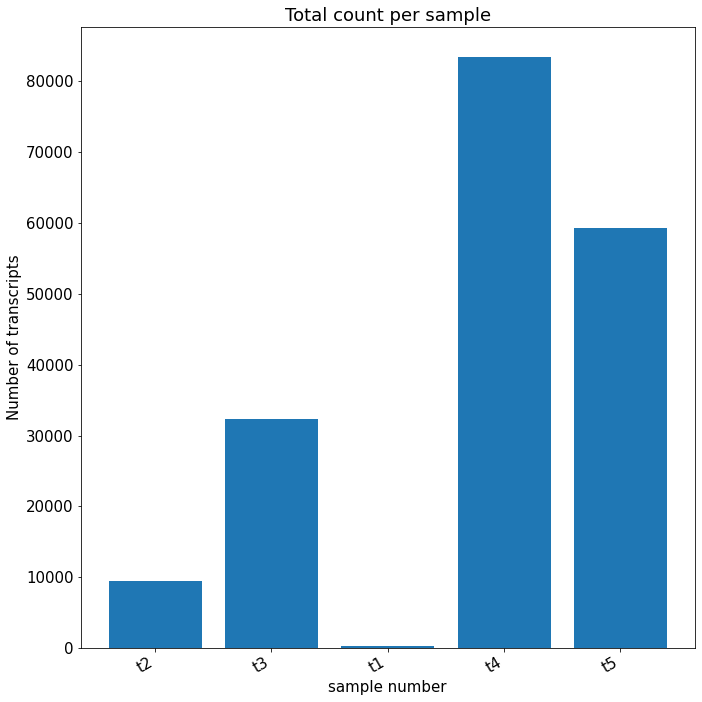

In [106]:
plt.bar(snakemake.params.datasetnames, totals)
plt.ylabel('Number of transcripts')
plt.xlabel('sample number')
plt.title('Total count per sample')
plt.xticks(rotation=30, ha='right')
plt.savefig(snakemake.output.total, dpi=200)

Get count per annotated gene

In [91]:
count_per_gene = {}
for gene_name, values in subreads_counts.items():
    count_per_gene[gene_name] = sum(subreads_counts[gene_name][len(snakemake.params.datasetnames):])

Plot count per annotated gene

Text(0.5, 1.0, 'Raw counts per feature')

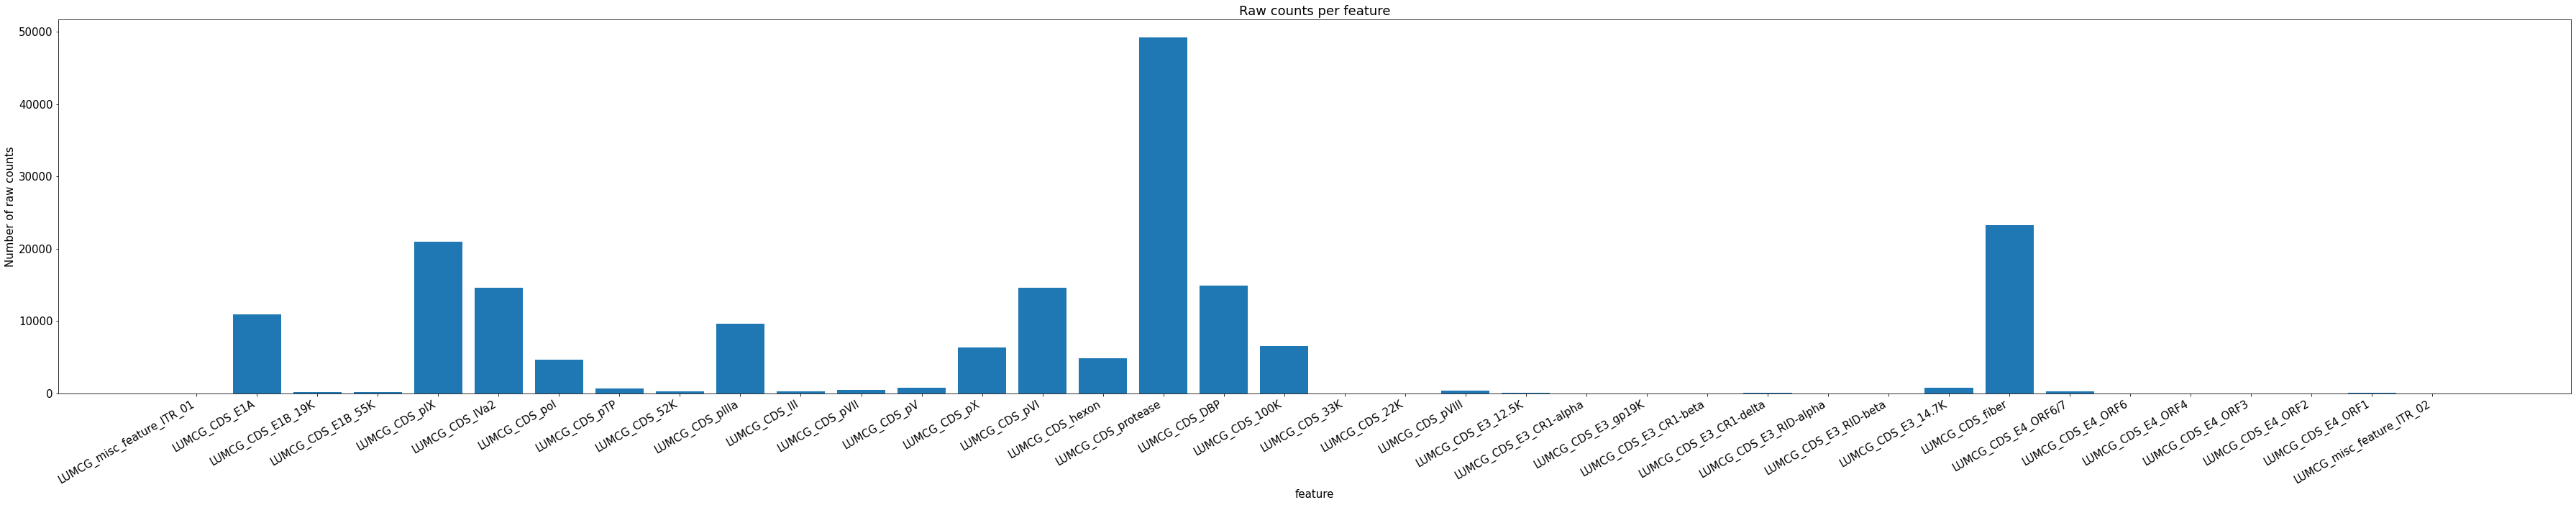

In [117]:
labels, data = [*zip(*count_per_gene.items())]
plt.rcParams["figure.figsize"] = [50, 10]
plt.bar(labels, data)
plt.ylabel('Number of raw counts')
plt.xlabel('feature')
plt.xticks(rotation=30, ha='right')
plt.title('Raw counts per feature')
plt.savefig(snakemake.output.per_feature, dpi=200)

#### Pipeline counts data preparation

Function for sorting oxford counts

In [144]:
def sort_ox(sort_order, counts):
    with open(snakemake.input.oxford_count, 'r') as file:
        order = file.readline().strip().split(',')[1:]
    current_order = [(i,j) for i,j in zip(order,counts)]
    current_order.sort(key = lambda i: sort_order.index(i[0]))
    sorted_counts = [item[1] for item in current_order]
    return sorted_counts

Read in count data and populate dictonary

In [149]:
count_dict = {}

counts_location = range(11, 11+len(snakemake.params.datasetnames))
talon_samples = np.genfromtxt(snakemake.input.talon_count, delimiter='\t', skip_header=True, usecols=(counts_location))
count_dict['talon'] = talon_samples.sum(axis=0)

counts_location = range(1, 1+len(snakemake.params.datasetnames))
flair_samples = np.genfromtxt(snakemake.input.flair_count, delimiter='\t', skip_header=True, usecols=counts_location)
count_dict['flair'] = flair_samples.sum(axis=0)
    
counts_location = range(1, 1+len(snakemake.params.datasetnames))
oxford_samples = np.genfromtxt(snakemake.input.oxford_count, delimiter=',', skip_header=True, usecols=counts_location)
                              
counts = oxford_samples.sum(axis=0)
sorted_counts = sort_ox(snakemake.params.datasetnames, counts)
count_dict['oxford'] = sorted_counts

counts_location = range(6, 6+len(snakemake.params.datasetnames))
subread_samples = np.genfromtxt(snakemake.input.subread_count, delimiter='\t', skip_header=2, usecols=counts_location)
count_dict['subread'] = subread_samples.sum(axis=0)

Dictionary to dataframe

In [150]:
rename = {num: name for (num, name) in enumerate(snakemake.params.datasetnames)}
count = pd.DataFrame.from_dict(count_dict)
count = count.rename(index=rename)

,talon,flair,oxford,subread
T2_fastq_pass.filtered,101025.0,44352.0,13242.0,9416.0
T3_fastq_pass.filtered,532952.0,243214.0,20476.0,32382.0
T1_fastq_pass.filtered,1518.0,505.0,1312.0,343.0
T4_fastq_pass.filtered,800782.0,302716.0,517468.0,83441.0
T5_fastq_pass.filtered,832118.0,343092.0,19522.0,59301.0


Take a look at the dataframe

In [ ]:
count

#### Plots pipeline counts + subread

Plot total number of counts per sample per pipeline

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'T2_fastq_pass.filtered'),
  Text(1, 0, 'T3_fastq_pass.filtered'),
  Text(2, 0, 'T1_fastq_pass.filtered'),
  Text(3, 0, 'T4_fastq_pass.filtered'),
  Text(4, 0, 'T5_fastq_pass.filtered')])

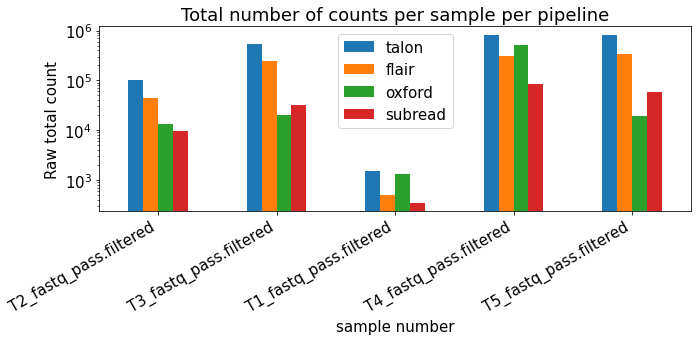

In [148]:
count.plot(kind="bar", figsize=(10, 5))
plt.yscale('log')
plt.ylabel('Raw total count')
plt.xlabel('sample number')
plt.title('Total number of counts per sample per pipeline')
plt.xticks(rotation=30, ha='right')
plt.savefig(snakemake.output.comp, dpi=200)